# Covid19 data analysis
Data analysis often requiring pre-processing of the data before the actual analysis. One must have a good understanding of not only the contents of the data but also must pay attention to the layout of the data. Many a times it is imperative to change the layout of the data to perform the analysis that we intend to do. We'll now look at some of these concepts in action using the Covid19 data avaiable from Our World in Data. The csv file is available [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
df1 = pd.read_csv("owid-covid-data.csv")
print(df1.shape)
df1.tail()

(214477, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
214472,ZWE,Africa,Zimbabwe,2022-09-02,256744.0,6.0,8.857,5596.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
214473,ZWE,Africa,Zimbabwe,2022-09-03,256755.0,11.0,10.429,5596.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
214474,ZWE,Africa,Zimbabwe,2022-09-04,256763.0,8.0,9.143,5596.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
214475,ZWE,Africa,Zimbabwe,2022-09-05,256769.0,6.0,9.286,5596.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
214476,ZWE,Africa,Zimbabwe,2022-09-06,256782.0,13.0,10.571,5596.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


This is a large dataset having thousands of rows and multiple columns. First, lets check what all information we have in this dataset i.e. what all columns are there. This can be achived by `columns` attribute of the dataframe. Please refer to the Our World in Data website for more information about the contents of this dataset.

In [5]:
df1.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Next, we need to ask question(s) that we would like to be addressed through the analysis of this data. One such question could be &ndash; which are the top 10 countries with the highest number of total Covid19 cases? Given our dataset, we need to breakdown this problem into different steps. First get all the rows with the most current date in the date column. For this example we'll retain only the location and total_cases columns although we can certain retain the entire dataset as well. An important point to note here is that that the location column need not have only the names of countries; there are certain groups name that are present as well, which we need to filter out. To filter these non-country location we need to prepare a list of all such group names (viz. World, Asia, etc). This list would then be passed to the `isin` function to make the required selection from the original dataframe. Next, using the `nlargest` function we can get the top _n_ values for the total_cases column. The total_cases are formated to show the values with commas.

In [6]:
top_10 = df1[df1["date"]=="2022-09-06"][["location","total_cases"]]
groups_list = ["World","High income","Upper middle income", "Europe", "Asia", "European Union", \
               "Africa", "Lower middle income", "North America", "South America"]
top_10 = top_10.loc[~top_10["location"].isin(groups_list)] # note the ~ operator
top_10 = top_10.nlargest(10,"total_cases").reset_index(drop=True)
top_10.style.format({"total_cases": "{:,.0f}"})

,location,total_cases
0,United States,"94,898,863"
1,India,"44,469,661"
2,France,"34,685,277"
3,Brazil,"34,477,539"
4,Germany,"32,344,032"
5,South Korea,"23,791,961"
6,United Kingdom,"23,521,792"
7,Italy,"21,969,725"
8,Japan,"19,640,667"
9,Russia,"19,521,190"


To get countries with the maximum number of cases per continent, we can use the `groupby` function to group the dataframe by continent column. Then using the `idmax` function the indices of the highest value for the total_cases column is retrieved. To get the final list, use these indices to get rows by location i.e. with the `loc` attribute of the dataframe.

In [7]:
top_10_cont = df1[["continent","location","total_cases"]]
top_10_cont.loc[top_10_cont.groupby("continent")["total_cases"].idxmax()].reset_index(drop=True)

,continent,location,total_cases
0,Africa,South Africa,4012920.0
1,Asia,India,44469661.0
2,Europe,France,34685277.0
3,North America,United States,94898863.0
4,Oceania,Australia,10095000.0
5,South America,Brazil,34477539.0


Bar plot of top 10 countries.

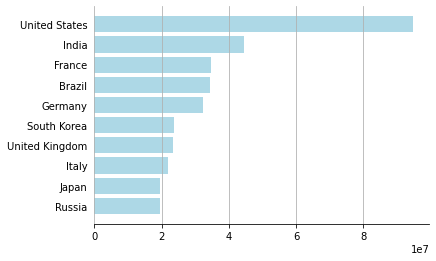

In [8]:
fig, ax = plt.subplots()
ax.barh(top_10["location"],top_10["total_cases"], color="lightblue")
ax.spines[["top","right","left"]].set_visible(False)
ax.yaxis.set_ticks_position('none')
a=ax.get_yticklabels()
ax.grid('on',which='major',axis='x')
ax.invert_yaxis()
plt.show()

## Changing axis scale
On a linear scale there is a fixed increment at regular intervals. The positioning of the tick marks on the axis for a graph with linear scale is calculated by addition. Whereas, on a log scale the ticks on the axis are marked using multiplication factor. This makes log scale graphs less intuitive to understand the underlying information and therefore it requires some training to parse graphs with log scale. Let's plot some data to get a clarity on this distinction between these scales. For this example, we'll plot exponential curve i.e. the values would be like 1,2,4,8,16,32...etc. The graphs below shows this trend plotted with y-axis having a linear (left) and a log (right) scale. Notice how different the two curves look! The log scale graph is useful in interpreting the pattern of the growth such that an exponential growth on a log scale would result in a straight line. 

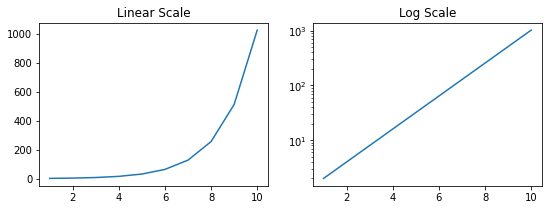

In [9]:
import numpy as np
N=1
x = range(1,11)
y = []
for a in x:
    N = N*2
    y.append(N)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(9,3))
ax1.plot(x,y)
ax2.plot(x,y)
ax2.set_yscale('log')
ax1.set_title("Linear Scale")
ax2.set_title("Log Scale")
plt.show()

Let's plot the emergence of new cases on linear and log scales.

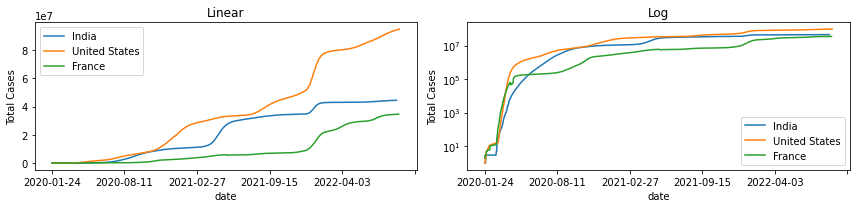

In [10]:
fig,ax=plt.subplots(1,2,figsize=(12,3))

df1[df1["location"]=="India"].plot(x="date", y="total_cases",ax=ax[0])
df1[df1["location"]=="United States"].plot(x="date", y="total_cases",ax=ax[0])
df1[df1["location"]=="France"].plot(x="date", y="total_cases",ax=ax[0])
ax[0].legend(["India","United States", "France"])
ax[0].set_ylabel("Total Cases")
ax[0].set_title("Linear")

df1[df1["location"]=="India"].plot(x="date", y="total_cases",ax=ax[1])
df1[df1["location"]=="United States"].plot(x="date", y="total_cases",ax=ax[1])
df1[df1["location"]=="France"].plot(x="date", y="total_cases",ax=ax[1])
plt.legend(["India","United States", "France"])
ax[1].legend(["India","United States", "France"])
ax[1].set_ylabel("Total Cases")
ax[1].set_yscale("log")
ax[1].set_title("Log")
plt.tight_layout()
plt.show()

## Function to plot total cases
We can write a function to plot the time series of total cases for any location(s). This function would be define with `*args` to hold a list of locations that need to be plotted.

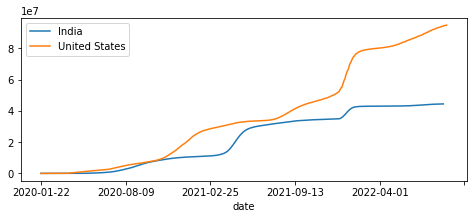

In [11]:
def plot_country(*args):
    fig,ax=plt.subplots(figsize=(8,3))
    for c in args:
        df1[df1["location"]==c].plot(x="date", y="total_cases",ax=ax)
    plt.legend(args)
    plt.show()

plot_country("India","United States")

The visualize emergence of new cases over time, we need to plot the new_cases for a given location. This kind of plot would give us an idea about the "waves" of the pandemic.

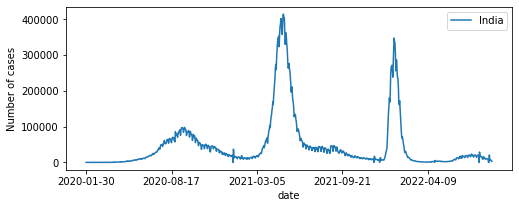

In [12]:
fig,ax=plt.subplots(figsize=(8,3))
df1[df1["location"]=="India"].plot(x="date", y="new_cases",ax=ax)
plt.ylabel("Number of cases")
plt.legend(["India"])
plt.show()

## The datetime object

The analyze a particular country in detail, a subset of the dataframe can be created having data for only that country. In the example below we'll make a dataframe for location "India" and then we'll find out number of monthly cases in a specific year. For this we'll first need to change the datatype of the "date" column to pandas `datetime64[ns]` datatype. The datatypes for all the columns can be checked by used the `dtypes` attribute for the dataframe.

In [4]:
df_India = df1[df1["location"]=="India"]
df_India.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
88211,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
88212,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
88213,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
88214,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
88215,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN


In [5]:
print("The data type for the date column is", df_India['date'].dtype)
df_India['date'] = pd.to_datetime(df_India['date'])
print("The data type for the date column is", df_India['date'].dtype)

The data type for the date column is object
The data type for the date column is datetime64[ns]


C:\Users\bioinfo guru\AppData\Local\Temp\ipykernel_70308\571516330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_India['date'] = pd.to_datetime(df_India['date'])


In [26]:
df_India_2022 = df_India[(df_India["date"] >= '2022-01-01')]
df_India_2022.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
human_development_index                           float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

In [27]:
df_months = df_India_2022.groupby(df_India_2022['date'].dt.strftime('%B'))["new_cases"].sum().to_frame().reset_index()
df_months.style.format({"new_cases": "{:,.0f}"})

,date,new_cases
0,April,"53,413"
1,August,"400,064"
2,February,"1,461,546"
3,January,"6,607,920"
4,July,"567,041"
5,June,"308,402"
6,March,"94,730"
7,May,"81,644"
8,September,"33,322"


## Categorical variables

To sort the dataframe by month, we need to first change the data type of the months column to catagorical since the default data type of this column (object) would lead to sorting by alphabetical order. We would like to sort this column by the order that we see in a calender (which, of course, is not alphabetical).

In [28]:
import ipywidgets as widgets

df_months.sort_values(by="date",inplace=True, ignore_index=True)
df_months_1 = df_months.style.set_caption("Date as object data type")
df_months_1.format({"new_cases": "{:,.0f}"})
output1 = widgets.Output()
with output1:
    display(df_months_1)

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df_months['date'] = pd.Categorical(df_months['date'], categories=months, ordered=True)
df_months.sort_values(by="date",inplace=True, ignore_index=True)
df_months_2 = df_months.style.set_caption("Date as catagorical data type")
df_months_2.format({"new_cases": "{:,.0f}"})
output2 = widgets.Output()
with output2:
    display(df_months_2)

two_columns = widgets.HBox([output1, output2])
display(two_columns)


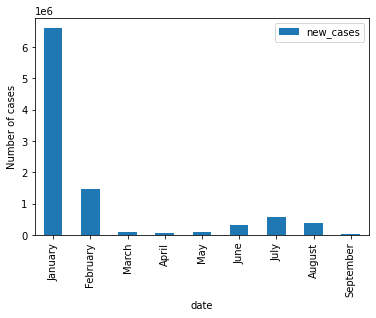

In [18]:
fig,ax=plt.subplots()
df_months.plot(kind="bar",xlabel="date", ax=ax)
ax.set_xticklabels(["January", "February", "March", "April", "May", "June", \
          "July", "August", "September"])
plt.ylabel("Number of cases")
plt.show()

In [19]:
df_India_2022["date"] = df_India_2022["date"].dt.strftime('%B')
months = ["January", "February", "March", "April", "May", "June","July", "August", "September"]
df_India_2022['date'] = pd.Categorical(df_India_2022['date'], categories=months, ordered=True)
df_India_2022.sort_values(by="date",inplace=True, ignore_index=True)
df_India_2022.head()

C:\Users\bioinfo guru\AppData\Local\Temp\ipykernel_66144\3114432298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_India_2022["date"] = df_India_2022["date"].dt.strftime('%B')
C:\Users\bioinfo guru\AppData\Local\Temp\ipykernel_66144\3114432298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_India_2022['date'] = pd.Categorical(df_India_2022['date'], categories=months, ordered=True)
C:\Users\bioinfo guru\AppData\Local\Temp\ipykernel_66144\3114432298.py:4: SettingWithCopyWarning: 
A value is try

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,IND,Asia,India,January,34889132.0,27553.0,14618.571,481770.0,284.0,298.286,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
1,IND,Asia,India,January,41469499.0,167059.0,238613.857,496242.0,1192.0,825.714,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
2,IND,Asia,India,January,41302440.0,209918.0,251301.714,495050.0,959.0,743.143,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
3,IND,Asia,India,January,41092522.0,234281.0,265036.857,494091.0,893.0,668.857,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
4,IND,Asia,India,January,40858241.0,235532.0,279215.714,493198.0,871.0,616.286,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN


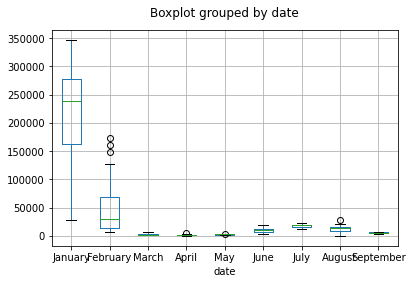

In [20]:
ax = df_India_2022.boxplot(column="new_cases",by="date")
plt.title("")
plt.show()

## Data visualization

In [21]:
import seaborn as sns

In [22]:
new_df = df1.loc[df1['location'].isin(["India","United States"])]
new_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
88211,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
88212,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
88213,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
88214,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
88215,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203103,USA,North America,United States,2022-09-02,94733881.0,82785.0,78205.571,1047482.0,472.0,501.571,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
203104,USA,North America,United States,2022-09-03,94743672.0,9791.0,77982.714,1047504.0,22.0,500.429,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
203105,USA,North America,United States,2022-09-04,94749783.0,6111.0,77879.571,1047505.0,1.0,500.286,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
203106,USA,North America,United States,2022-09-05,94769820.0,20037.0,66083.857,1047576.0,71.0,444.714,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN


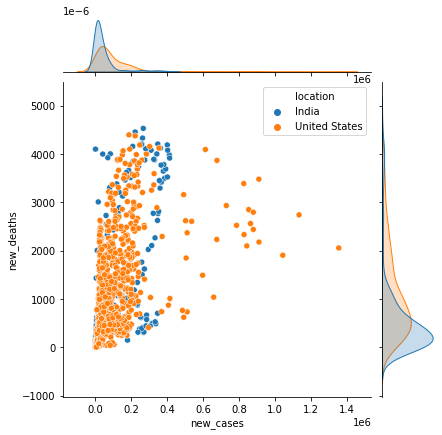

In [23]:
sns.jointplot(data=new_df,\
              x="new_cases",y="new_deaths", hue="location")

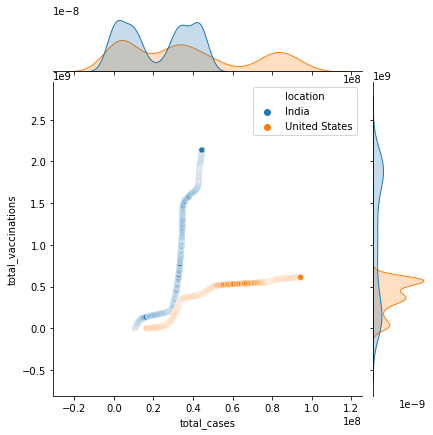

In [24]:
sns.jointplot(data=new_df, x="total_cases",y="total_vaccinations", hue="location")

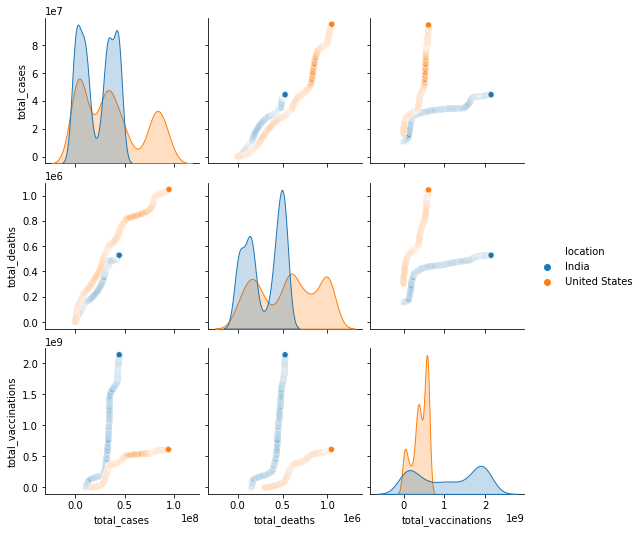

In [25]:
sns.pairplot(new_df[["location","total_cases","total_deaths","total_vaccinations"]],hue="location")

## Geopandas

The geopandas library facilitates plot data over maps and can be installed using the command `pip install geopandas`. To work with this library, we need the shape files for the locations over which the data needs to be plotted. Here, we'll plot the total_cases over the world map. We'll use the countries shape files from [this link](https://github.com/nvkelso/natural-earth-vector/tree/master/110m_cultural). 

In [26]:
import geopandas as gpd

First we'll create a new dataframe having the last row for each country since that would have the lastest count for the total_cases.

In [27]:
df1_last = df1.groupby('location').last()
df1_last.head()

,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,Asia,2022-09-06,194614.0,259.0,230.000,7783.0,0.0,0.857,4853.282,...,NaN,NaN,37.746,0.50,64.83,0.511,NaN,NaN,NaN,NaN
Africa,OWID_AFR,None,2022-09-06,12333163.0,1550.0,1188.714,256572.0,5.0,7.714,8857.522,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,ALB,Europe,2022-09-06,330283.0,62.0,180.857,3583.0,0.0,0.143,115697.566,...,7.1,51.2,NaN,2.89,78.57,0.795,16257.3,32.60,-3.38,5694.904211
Algeria,DZA,Africa,2022-09-06,270476.0,15.0,29.143,6879.0,0.0,0.143,6122.418,...,0.7,30.4,83.741,1.90,76.88,0.748,49888.7,26.86,29.47,1129.266490
Andorra,AND,Europe,2022-09-06,46027.0,0.0,0.000,154.0,0.0,0.000,582369.613,...,29.0,37.8,NaN,NaN,83.73,0.868,89.6,27.20,31.41,1133.689298


Read the shape file into a dataframe

In [28]:
gdf = gpd.read_file('C:/Users/bioinfo guru/Downloads/ne_110m_land/ne_110m_admin_0_countries.shp') 

The next step is to merge the Covid-19 dataframe with the shape file dataframe created above. The country name in two dataframe will be used for this merging. An important point to consider here is that the names for different countries in the two dataframes should be exactly same for this merging to work correctly. In the `gdf` dataframe, under the SOVEREIGNT column the full name for USA is United States of America while in our Covid-19 dataframe it is United States. So, we'll edit `gdf` to make the country name same in the two dataframes. Similarly, we must ensure that other names match as well. 

In [29]:
gdf = gdf.replace(['United States of America'], 'United States')
gdf

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States,US1,1,2,Country,1,United States,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


Now, lets merge the two dataframes on country names i.e. `gdf` on SOVEREIGNT and `df1_last` on location.

In [30]:
merged_gdf = gdf.merge(df1_last, left_on='SOVEREIGNT', right_on='location')

Plot the data

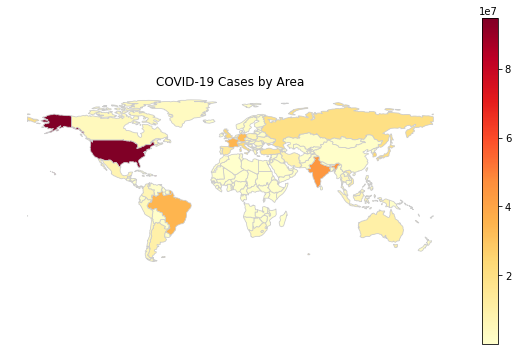

In [31]:
fig, ax = plt.subplots(1, figsize=(10,  6))
merged_gdf.plot(column='total_cases', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('COVID-19 Cases by Area')
plt.axis('off')
plt.show()